



## Predicción de la rotación de empleados con 3 meses de anticipación para retención de talento y reducción de costos asociados a capacitación y reclutamiento através de modelos bayesianos.



### Modelos Lineales Generalizados

### Integrantes:

Ana Coronel.

Karla Alfaro.

Paola Mejía.
 
Rodrigo Suárez.

### Overview:



In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di 
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

### Overview 


Profuturo SA de CV es una institución financiera privada encargada de administrar los fondos de los trabajadores en México para su retiro. Dicha administración se hace a través de cuentas personales que asigna a cada trabajador, en las que se depositan las aportaciones hechas a lo largo de su vida laboral.

Todas las Afores están reguladas por la CONSAR (https://www.gob.mx/consar), la Comisión Nacional del Sistema de Ahorro para el Retiro. Esta se encarga de:

    1) Vigilar que tus recursos estén seguros.
    
    2) Supervisar que se inviertan dentro de los parámetros y límites establecidos.
    
    3) Obligar a cada AFORE a una reducción anual de comisiones cobradas a cada cuenta individual.


Basado en el tercer punto, el organismo explicó que existen tres razones por las que las comisiones deben bajar:

    1) Las comisiones afectan de manera adversa el saldo pensionario de mantenerse elevadas por mucho tiempo.
    
    2) Las comisiones en México continúan en un nivel por encima de la práctica internacional de administradores de fondos similares.
    
    3) Los saldos en el SAR seguirán creciendo de manera sostenida por al menos 15 años más por lo que las economías de escala en el Sistema permiten seguir bajando comisiones.


Por tanto, uno de los esfuerzos que busca la AFORE consiste en reducir los gastos asociados a la administración, inversión y operación de cada cuenta, así como reducir los gastos comerciales que están asociados a adquirir nuevos clientes. Entre los gastos comerciales más relevantes:

* Gastos de adquisión de cuentas: Sueldos, bonos y comisiones.

* Gastos de capacitación: Eventos y dinámicas de integración.

* Gastos de licencia: Gastos asociados a exámenes y cursos regulatorios.


Particularmente, una problemática a la que se enfrenta Profuturo SA de CV, repercute en el alto costo relacionado a la adquisición de cuentas nuevas que conlleva reclutar asesores de ventas, capacitarlos así como realizar los pagos de exámenes y licencias para darse de alta frente al organismo regulador. Sin embargo, aunque la inversión es elevada muchos asesores contratados causan baja por diferentes motivos; es decir, después de que se invierte en la capacitación, cursos y exámenes deciden renunciar o abandonar la institución. 

Finalmente, lo que se busca es conocer de manera anticipada aquellos individuos (asesores de venta) más probables a abandonar la institución a los 6 meses (tiempo que dura la capacitación, el período de exámenes y cursos inductivos) y generar campañas que permitan retener el talento para disminuir la tasa de rotación de personal y los gastos asociados.

### Objetivo del proyecto 

Calcular la probabilidad de que un nuevo asesor de ventas renuncie a los 6 meses.


### Contenido del proyecto:

* Un reporte con el análisis exploratorio de datos (EDA).

* Análisis inferencial

* Resultados 

* Conclusiones

* Bibliografía

* Anexos

### Contexto del problema 

1)¿Cuál es el problema?

    El problema radica en una elevada tasa de rotación de asesores de venta, superando una tasa del 50% de rotación anual; es decir, por cada 2 asesores contratados, 1 se va de la compañía antes de cumplir los 6 meses, tiempo que dura la capacitación.
  
2)¿Por qué es un problema?

     La consecuencia es elevados costos de capacitación y desarrollo del equipo encargado de captación de nuevos clientes.

3)¿Para quién es un problema?

    Para Profuturo SA de CV, quién al tener elevados costos de capacitación y desarrollo, puede disminuir su Rentabilidad como resultado de la presión del organismo regulador (CONSAR) al reducir el cobro de comisión a los clientes que tienen una cuenta individual; es decir, se disminuirían los ingresos y se mantendrían los gastos sino se logran disminuir.

### Análisis exploratorio de datos (EDA)

En este apartado se da información acerca de la base de datos analizada, con la intención de conocer información acerca de:

* Distribuciones
* Medidas de centralización y dispersión
* Correlaciones
* Valores missings
* Outliers
* Plots

La base de datos que se utilió para este análisis se describe a continuación:

In [2]:
import numpy as np
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from matplotlib import pyplot as plt 
import numpy as np
from Class_Eda import Eda

#Instanciamos el objeto Eda
objEda = Eda()

#Inicializamos los parámetros principales (por el momento, sólo es uno: la ruta de la fuente de datos)
objEda.strRutaDataSource='clean_rotacion.csv'

#Proceso de carga 
objEda.Cargar_Datos()

#Obtenemos número de filas y número de columnas
objEda.Mostrar_Resumen()

Fuente:  clean_rotacion.csv
Observaciones:  1242
Variables:  18


Se cuenta con información disponible a partir de Julio del 2015, que es cuándo el departamento de RRHH de la compañía comenzó a darse cuenta de los altos índices de rotación de asesores de ventas, por lo cual decide generar una base de datos donde se recabe información acerca de los perfiles de contratación así como generar encuentas de información de ventas, tanto para los empleados existentes como para nuevas contrataciones. Para esté análisis el área de BI compartió información desde Julio 2015 hasta el final de ese año con la finalidad de verificar si existen algunas características intrínsecas a las personas que permitan conocer si puede consolidarse como asesor de ventas o por el contrario buscará cambiarse de trabajo en el corto plazo.

La información compartida fue la siguente:

* F_alta: Fecha de alta del asesor una vez que fue contratado por la compañía.


* Género: Género asociado a una persona, en este caso hombre y mujer.


* Edad: Edad de la persona una vez que es contratado por la compañía. 


* Sucursal: Sucursal donde se le asignará o se le asignó al asesor. Existen 174 sucursales con presencia en los punto y zonas metropolitanas más importantes del país.


* Div: Zona a la que pertenece la sucursal donde se le asignará. Se divide en Zona Norte y Zona Sur.


* Antigüedad: Antigüedad laboral una vez que la persona se dio de alta en el IMSS / ISSSTE como empleado formal.


* Num_trabajos_previos: Número de trabajos previos antes de emplearse en la compañía.


* Edo_civil: Estado civil del asesor contratado.


* Experiencia: Información acerca de la experiencia en años de un asesor en ventas.


* Escolaridad: Si al momento de contratación, cuenta con bachilletaro, licenciatura o maestría.


* Salario_diario_ant: Salario en días con el que cotizaba en el trabajo inmediato anterior.


* Dependientes: Si el asesor contaba con dependientes económicos como hijos, padres, etc.


* Num_ventas: Número de ventas realizadas en sus primeros 3 meses en la compañía.


* Sueldo_prom: Sueldo promedio de los primeros 3 meses en la compañía, como resultado de las ventas realizadas en el mismo intervalo de tiempo.


* num_dias: Conteo del número de días desde la fecha de alta hasta que abandonó la compañía. Si no la ha abandonado se contabilizó desde la fecha de alta hasta el día de cálculo del 1 de diciembre del 2019.


A manera de ejemplo, se presenta la base de datos original con la que se cuenta:

In [3]:
#Mostramos el dataset original para tener un panorama general
objEda.pdDataSetOriginal.head()

,key,f_alta,genero,edad,sucursal,div,num_ventas,sueldo_prom,antiguedad,num_trabajos_previos,edo_civil,experiencia,escolaridad,salario_diario_ant,num_dias,rotacion,dependientes,incremento
0,16265,27-Jul-15,1,55,GUADALAJARA TLAQUEPAQUE,1,3,1201.8317,34,7,1,3,2,3587.2000,35,1,1,-0.664967
1,16284,27-Jul-15,2,26,LA PAZ,1,18,14248.2530,3,0,2,2,2,11764.8000,396,0,2,0.211092
2,16291,27-Jul-15,2,30,CULIACAN,1,1,468.8550,13,8,2,2,1,13376.0000,60,1,2,-0.964948
3,16279,27-Jul-15,1,27,POLANCO,2,2,2730.2989,9,1,2,2,1,11643.2000,43,1,2,-0.765503
4,16241,27-Jul-15,2,27,EL SALTO,1,2,1151.8204,2,0,2,3,3,6779.2002,35,1,3,-0.830095


Se llevó a cabo un proceso de limpieza de la información que consistió en convertir variables "string" a minúsculas, quitar acentos y caracteres inválidos.

In [4]:
objEda.Convertir_A_Minusculas()
objEda.Quitar_Acentos()
objEda.Quitar_Caracteres_Invalidos()
objEda.pdDataSet.sample(4)

,key,f_alta,genero,edad,sucursal,div,num_ventas,sueldo_prom,antiguedad,num_trabajos_previos,edo_civil,experiencia,escolaridad,salario_diario_ant,num_dias,rotacion,dependientes,incremento
1160,17391,14-dec-15,2,35,puerto,2,16,6738.0611,10,2,2,2,2,6292.7998,493,0,2,0.070757
534,16778,21-sep-15,1,32,ensenada,1,1,78.1425,12,2,2,3,2,10366.4000,35,1,3,-0.992462
1026,17259,23-nov-15,1,58,chapala,1,2,750.1680,40,11,1,3,2,760.0000,45,1,1,-0.012937
637,16866,05-oct-15,2,29,saltillo,1,1,12.5028,13,3,2,3,1,10244.8000,64,1,1,-0.998780


In [5]:
#Proceso de limpieza del objeto:
objEda.Limpiar_Datos()

#Proceso de cambio de tipo de dato:
#Categóricas:
objEda.pdDataSet['edo_civil']=objEda.pdDataSet['edo_civil'].astype(str)
objEda.pdDataSet['dependientes']=objEda.pdDataSet['dependientes'].astype(str)
objEda.pdDataSet['experiencia']=objEda.pdDataSet['experiencia'].astype(str)
objEda.pdDataSet['escolaridad']=objEda.pdDataSet['escolaridad'].astype(str)
objEda.pdDataSet['div']=objEda.pdDataSet['div'].astype(str)
objEda.pdDataSet['genero']=objEda.pdDataSet['genero'].astype(str)
objEda.pdDataSet['sucursal']=objEda.pdDataSet['sucursal'].astype(str)

#Numéricas:
objEda.pdDataSet['antiguedad']=objEda.pdDataSet['antiguedad'].astype(int)
objEda.pdDataSet['num_trabajos_previos']=objEda.pdDataSet['num_trabajos_previos'].astype(int)
objEda.pdDataSet['salario_diario_ant']=objEda.pdDataSet['salario_diario_ant'].astype(int)
objEda.pdDataSet['incremento']=objEda.pdDataSet['incremento'].astype(float)
objEda.pdDataSet['edad']=objEda.pdDataSet['edad'].astype(int)
objEda.pdDataSet['num_ventas']=objEda.pdDataSet['num_ventas'].astype(int)
objEda.pdDataSet['sueldo_prom']=objEda.pdDataSet['sueldo_prom'].astype(int)
objEda.pdDataSet['num_dias']=objEda.pdDataSet['num_dias'].astype(int)

#Podemos visualizar la información más general de nuestro dataset y el tipo de dato que corresponde:
objEda.Imprimir_Variables('Num')
objEda.Imprimir_Variables('Cat')

---------------- Variables Numéricas ----------------
edad
num_ventas
sueldo_prom
antiguedad
num_trabajos_previos
salario_diario_ant
num_dias
incremento
---------------- Variables Categóricas ----------------
f_alta
genero
sucursal
div
edo_civil
experiencia
escolaridad
dependientes


Como el objetivo del análisis fue conocer si las personas que contrataron efectivamente superaron el período de capacitación de 6 meses (180 días); se generó una variable target o variable objetivo con la finalidad de formar grupos de interés.

    1) Grupo C: Aquellos asesores que superaron el período de capacitación de 180 días consolidandose como empleados de la compañía.

    2) Grupo R: Aquellos asesores que no superaron el período de capacitación de 180 días y rotaron a otros empleos o se desemplearon.

Se generó por tanto, una bandera o variable "dummy" donde se asignó el valor de 1 si pertenece al grupo R (grupo de interés por razones de rentabilidad) y el valor de 0 si pertenece al grupo C.

In [6]:
# Creación de variable objetivo

#Creamos un array temporal para almacenar la variable que contendrá si la mujer tiene más de 23 años
npArrayTmp=objEda.pdDataSet.num_dias<180

#Guardamos el arreglo en la nueva columna
objEda.pdDataSet['y']=npArrayTmp.astype(int)

objEda.pdDataSet['targetdesc']=np.where(objEda.pdDataSet['num_dias']<180,"R:<180", "C:>=180")

In [7]:
objEda.pdDataSet.sample(4)

,key,f_alta,genero,edad,sucursal,div,num_ventas,sueldo_prom,antiguedad,num_trabajos_previos,edo_civil,experiencia,escolaridad,salario_diario_ant,num_dias,rotacion,dependientes,incremento,y,targetdesc
744,17016,19-oct-15,2,40,cuautitlan,2,8,2807,19,7,1,2,1,7326,106,1,1,-0.616745,1,R:<180
494,16717,07-sep-15,2,28,san_marcos,1,10,3215,3,0,1,3,2,3648,127,1,2,-0.118463,1,R:<180
856,17111,02-nov-15,1,24,reynosa_frontera,1,12,9540,4,1,2,3,1,6171,175,1,1,0.545994,1,R:<180
1179,17396,14-dec-15,1,22,monterrey_chipinque,1,12,3100,4,2,1,3,1,1185,122,1,1,1.615384,1,R:<180


##### Pandas profiling para generar el data profiling de los datos. (Esto se puede eliminar, solo me ayudó en el EDA)


Se ejecutó el pandas profiling para conocer información acerca de las variables, las correlaciones, los valores extraños o missings así como los porcentajes que representaban ciertas categorías.

In [8]:
objEda.pdDataSet.profile_report(style={'full_width':True})

C:\Users\pmeji\Anaconda3\lib\site-packages\pandas_profiling\__init__.py:53: UserWarning: Sorting is supported from Python 3.6+
  warnings.warn("Sorting is supported from Python 3.6+")


In [9]:
#Si deseamos generar un resumen estadístico de algunas variables de interés.
#bastará con agregarlas a una matriz interna de la clase mediante el siguiente método
objEda.Add_Variable_Resumen('edad')
objEda.Add_Variable_Resumen('num_trabajos_previos')
objEda.Add_Variable_Resumen('sueldo_prom')
#objEda.Add_Variable_Resumen('incremento') Omitida porque no salen bien los cuartiles.
objEda.Add_Variable_Resumen('num_ventas')
objEda.Add_Variable_Resumen_Cat('genero')
objEda.Add_Variable_Resumen_Cat('div')
objEda.Add_Variable_Resumen_Cat('edo_civil')
objEda.Add_Variable_Resumen_Cat('targetdesc')
#Una vez agregadas todas las variables de interés, llamamos al método que calcula los datos estadísticos
#para cada variable
objEda.Calcular_Estadisticas_Resumen()

In [10]:
objEda.pdMatrizResumen_Num

,Mínimo,Máximo,Promedio,Varianza,Desv. Est.,qal25,qal50,qal75
edad,19,61,32.52415458937198,58.16890125790566,7.626853955459332,27.0,30.0,36.0
num_trabajos_previos,0,20,3.0668276972624797,6.807933414756211,2.6092016815026415,1.0,2.0,4.0
sueldo_prom,10,55821,4907.758454106281,26419177.57611613,5139.958908018247,961.75,3019.5,7555.25
num_ventas,1,39,8.865539452495975,52.32088976535171,7.233318032919036,2.0,7.0,15.0


In [11]:
objEda.pdMatrizResumen_Cat

,Uniques,Mode
genero,2,1
div,2,1
edo_civil,2,2
targetdesc,2,R:<180


Pendiente de escribir la relevancia de las medidas de centralización y dispersión.

#### Análisis exploratorio gráfico 

En este apartado, se reportó una descripción gráfica de los hallazgos encontrados durante el análisis respecto a la variable a predecir. Recordemos que estamos interesados en conocer con anticipación (a los 3 meses de contratación) aquellos asesores de venta contratados que no llegarán a los 180 días. Una parte importante será conocer si algunas variables pueden dar explicación por sí mismas a diferencias entre la variable target. 

Cabe recalcar, que la compañía desea conocer esta información de manera previa, para realizar campañas de retención de talento, por lo que observar de manera gráfica algunos comportamientos permitió generar hipótesis para la sección de estadística inferencial.

Por tanto, resultó importante observar si existen variables que podrían ayudar a encontrar insights que den una sugerencia discriminante acerca de la variable target (si el asesor rota o no). En muchas ocasiones está variable es notoria en cada asesor; sin embargo, para efectos de escalabilidad se otorgó evidencia gráfica y numérica de lo encontrado.

Resulta entonces inmedianto conocer la distibución de asesores que abandonaron el empleo del conjunto de información histórica con la que se realizó el estudio. Dicha distribución pretende dar un panorama global de los 


En el gráfico 1 debajo se muestra información de la distribución de la variable targetdesc, que no es más que una descripción de la variable target para cada uno de los 1242 asesores de estudio. De acuerdo a nuestra variable de interés, se clasifican en los siguientes grupos:

    1) Grupo R: Asesores que rotaron antes de los 6 meses o 180 días, que representan el 71 % del total de asesores.
    
    2) Grupo C: Asesores que lograron consolidarse después de los 6 meses o 180 días, que representaron el 29% del total de asesores.
    
    
La variable target entonces, estará distribuida de la siguiente forma: Grupo R con un 71% y Grupo C con un 29% del total.

<Figure size 720x720 with 0 Axes>

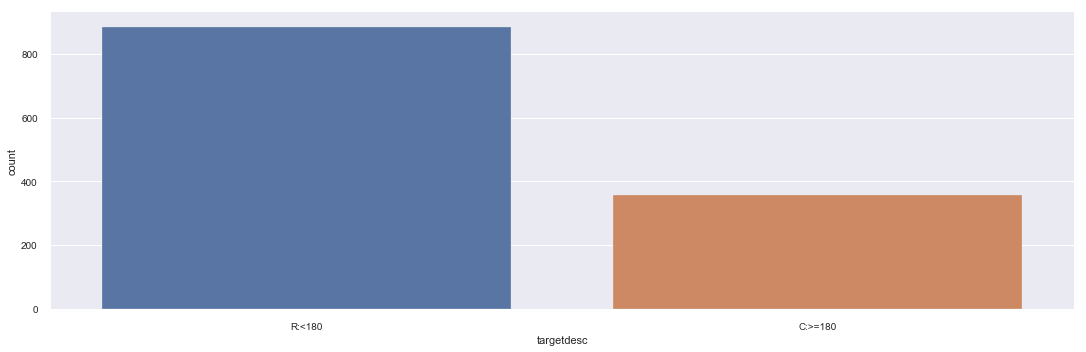

In [12]:
import matplotlib.pyplot as plt
# sns.factorplot('targetdesc',data=objEda.pdDataSet,kind="count", aspect=3)

plt.figure(figsize = (10, 10))
ax = sns.factorplot('targetdesc',data=objEda.pdDataSet,kind="count", aspect=3)
plt.savefig('./../img/targetdesc.png')

plt.show()

Con base en lo anterior, los hallazgos se centraron en encontrar diferencias gráficas (visuales) que puedan ayudar a distinguir entre asesores del grupo R (< 180 días) vs asesores del grupo C (>= 180). 


No obstante, de inicio y conociendo la distribución anterior, se esparaba que cada variable seleccionada tenga más asesores dentro del grupo R que del grupo C; por lo que los hallazgos se centraron en romper este patrón de inicio.


En el siguiente gráfico 2 se observa la escolaridad del asesor de ventas de acuerdo a cada grupo de interés siendo:


Escolaridad 1: Asesores con prepa técnica o bachilletaro.


Escolaridad 2: Asesores con Licenciatura concluida.


Escolaridad 3: Asesores con Maestría.


Sin embargo, prevalecen las condiciones iniciales, para cada grupo existen más asesores del grupo R que del grupo C como se observa a continuación:

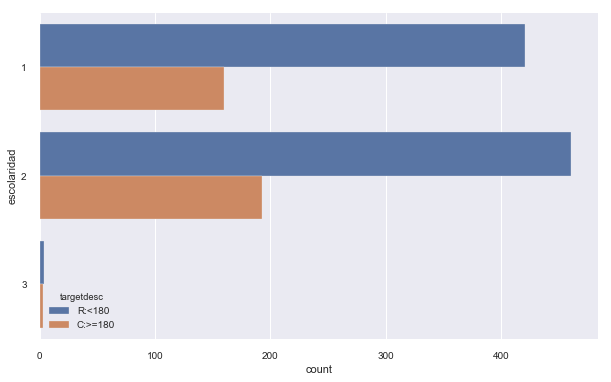

In [13]:
#Hacer el comparativo vs las variables configuradas. Escolaridad vs Target
#sns.countplot(y='escolaridad', hue='targetdesc', data=objEda.pdDataSet)


plt.figure(figsize = (10, 6))
ax = sns.countplot(y='escolaridad', hue='targetdesc', data=objEda.pdDataSet)

plt.savefig('./../img/escolaridad.png')
plt.show()        

Otra de las variables con las que se intentó observar diferencias y cambiar el tipo de patrones diferentes a la distribución original de los grupos fue la variable "edad" que da información acerca de la edad de en el momento de contratación del asesor en la compañía.

Lo que se observa en el gráfico 3 muestra ligeras diferencias entre los grupos R y C en la medida que cambian de edad; es decir, más personas del grupo R (< 180) se concentran en edades tempranas; sin embargo el comportamiento se lograr nivelar a medida de que las edades incrementan, mostrándose un cambio en la frecuencia (por ejemplo, en edades:44 y 45) siendo mayores los del grupo C (>=180).

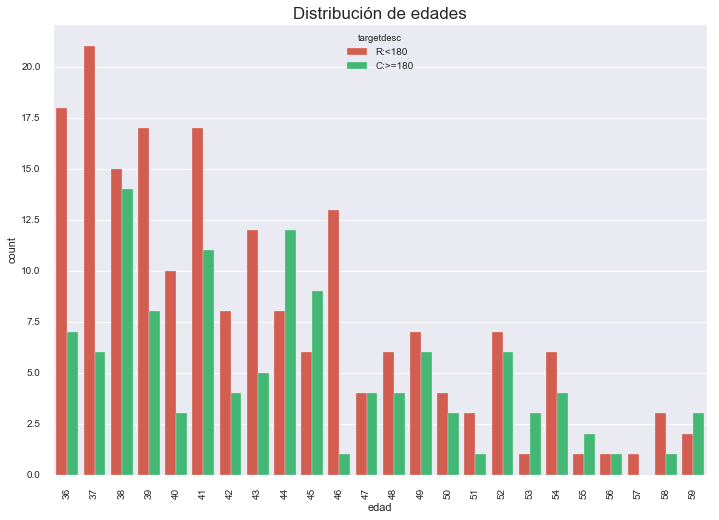

In [14]:
# Edad del asesor vs Target

plt.figure(figsize = (11.7,8.27))
ax = sns.countplot(x='edad',hue='targetdesc',data=objEda.pdDataSet.query('edad >= 36 and edad<=59'), palette= ["#e74c3c", "#2ecc71", "#95a5a6", "#3498db", "#9b59b6", "#34495e"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Distribución de edades',fontsize=17)

plt.savefig('./../img/edad.png')
plt.show()  


#sns.set(rc={'figure.figsize':(11.7,8.27)})
#chart = sns.countplot(x='edad',hue='targetdesc',data=objEda.pdDataSet.query('edad >= 36 and edad<=59'), palette= ["#e74c3c", "#2ecc71", "#95a5a6", "#3498db", "#9b59b6", "#34495e"])
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#chart.set_title('Distribución de edades',fontsize=17)

Por lo anterior, resultó importante estudiar las edades a fondo, en esta ocasión se comparó con el número de ventas realizadas para conocer el impacto de las ventas respecto al incremento de edad.

Lo que se observa en la Figura 4 muestra evidencia de que existe una tendencia clara, de que a partir de los 31 años en adelante (exceptuando los 21 años) los asesores logran llegar a más de 10 ventas en sus primeros 3 meses en la compañía con más facilidad; no obstante, aún hay quienes no logran superar esta barrera, pero se rescató la relevancia e impacto que tienen las ventas en la decisión de rotar o permenecer en un área de ventas, lo cuál parece que tiene mucho sentido. Por tanto, se compararán en los aiguientes gráficos el número de ventas para poder observar más hallazgos.

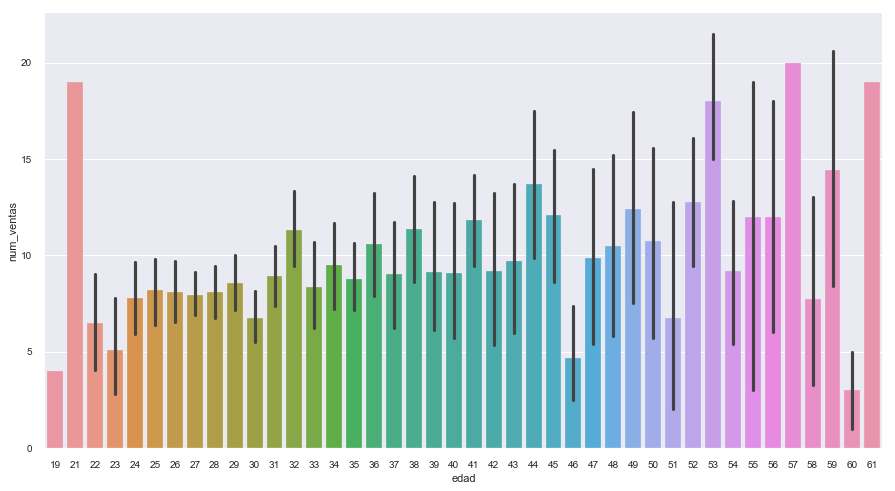

In [15]:
#Comportamiento de las ventas a medida que incrementa la edad.
from matplotlib import pyplot as plt

plt.figure(figsize = (15,8))
ax = sns.barplot(x="edad", y="num_ventas", data=objEda.pdDataSet)

plt.savefig('./../img/edad_ventas.png')
plt.show()  

#ax = sns.barplot(x="edad", y="num_ventas", data=objEda.pdDataSet)

En consecuencia, se decidió observar el comportamiento de las ventas de acuerdo a la experiencia en años del asesor, aunado a que si las ventas dan un indicio de que un asesor pueda rotar o no, alguien con experiencia puede tener más facilidades de convencimiento en ventas que una persona sin experiencia.

En el gráfico 5 se observa este comparativo mostrándo algunos asesores con un mejor número de ventas en la medida que su experiencia en ventas es de más tiempo. Posiblemente a la compañía le convenga establecer un límite de experiencia en años en el momento de la contratación para disminuir la tasa de rotación.

<Figure size 1080x576 with 0 Axes>

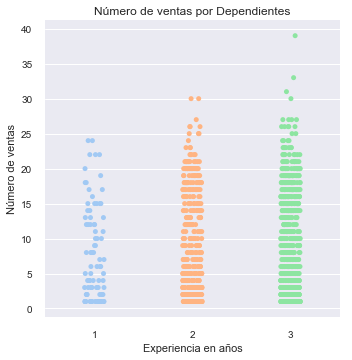

In [16]:
plt.figure(figsize = (15,8))
ax = objEda.Graficar_Degradado(objEda.pdDataSet,'experiencia','num_ventas','Experiencia en años','Número de ventas','Número de ventas por Dependientes')
plt.savefig('./../img/experiencia_ventas.png')
plt.show()

Finalmente, se observa una diferencia contundente en el gráfico 6 donde se muestra que el número de ventas tiene un impacto en la rotación de asesores. Es decir, el grupo que se consolida promedia ventas superiores a 10, mientras que los asesores que rotan promedian por debajo de las 10 ventas en sus primeros 3 meses. Lo relevante para la compañía será poder llevar acciones concretas para lograr que los asesores hagan más de 10 ventas en sus primeros 3 meses.

<Figure size 1080x576 with 0 Axes>

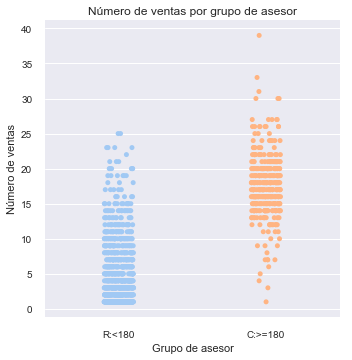

In [17]:

plt.figure(figsize = (15,8))
ax = objEda.Graficar_Degradado(objEda.pdDataSet,'targetdesc','num_ventas','Grupo de asesor','Número de ventas','Número de ventas por grupo de asesor')

plt.savefig('./../img/target_ventas.png')
plt.show()

Por otro lado, a la compañía le interesó conocer las distribución por genero para cada grupo de asesores , lo cuál se muestra en la Figura 7. Lo relevante es que muestra una diferencia entre hombre y mujeres en la tasa de rotación, ya que se observa que los hombres tienen menores niveles de rotación que las mujeres. No obstante, se validará si realmente existe una diferencia más adelante con un modelo jerárquico por género, y también se especificarán las implicaciones éticas de generar este tipo de categorías.

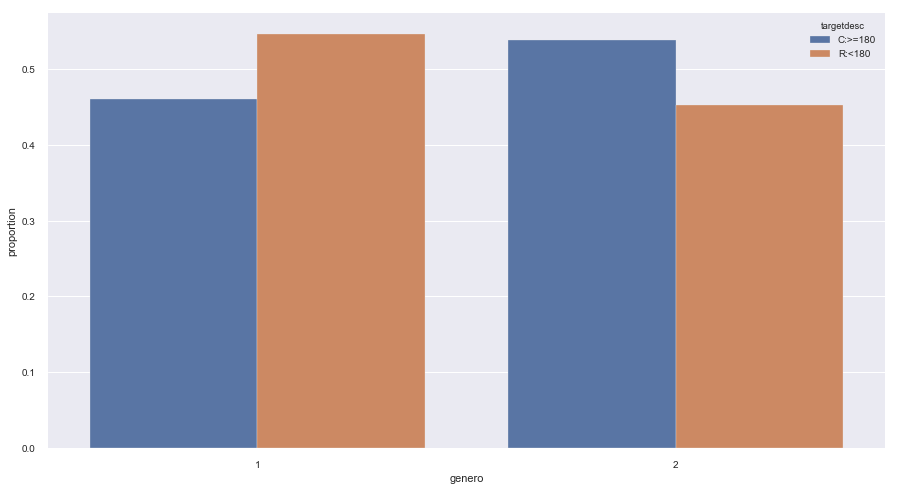

In [18]:
df = objEda.pdDataSet
x, y, hue = "genero", "proportion", "targetdesc"
hue_order = ["1","2"]

plt.figure(figsize = (15,8))
ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.savefig('./../img/genero_prop.png')
plt.show()


Adicionalmente se calculó una matriz de correlaciones lineales para variables "NUMÉRICAS" y tener mejores insights de cuáles pueden ser útiles en la modelación y predicción de asesores que rotan de la compañía. La matriz de correlación se muestra en el gráfico 7:

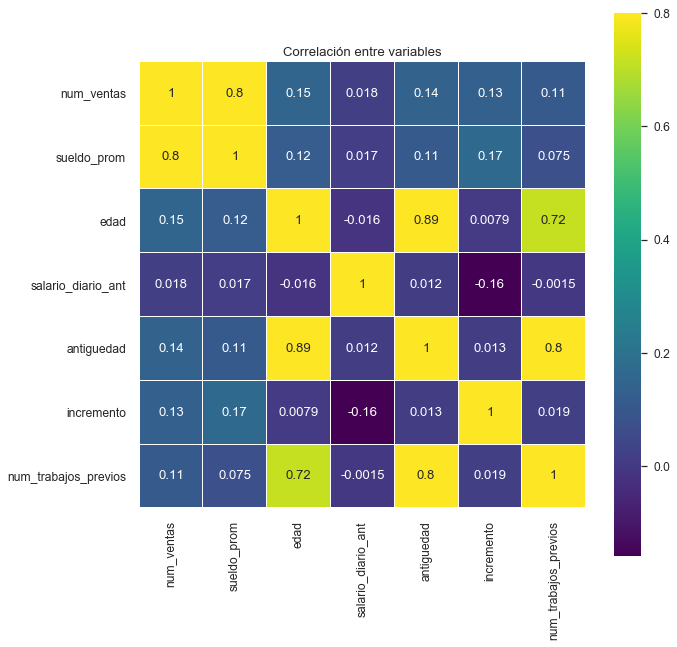

In [22]:
#Correlación variables numéricas

rotacion = objEda.pdDataSet
corrMatrix=rotacion[["num_ventas","sueldo_prom","edad","salario_diario_ant","antiguedad", "incremento",
                  "num_trabajos_previos"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

ax = sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlación entre variables');
plt.savefig('./../img/corr.png')
plt.show()



Con base en todo lo anterior, se utilizaron los hallazgos encontrados para el siguiente modulo del análsis, el análisis inferencial; sin embargo, cabe resaltar que muchas hipótesis que ahora tenemos se responderán en dicho modulo. Será importante entonces para la compañía, poder cuantificar con que tanta probabilidad un asesor puede rotar o no, y si puede anticiparse para evitar que se vaya de la compañía, logrando reducir costos de capacitación y esfuerzos de reclutamiento constante.

Las preguntas inmediatas que surgen son las siguientes:

* ¿Podrá Profuturo poder disminuir la tasa de rotación de asesores si logra anticiparse a que se vayan?


* ¿Logrará reducir los costos asociados a través de esfuerzos de retención de talento y gastos de reclutamiento?


* ¿Se podrá determinar incluso desde la contratación un perfil que sea más probable que los asesores se consoliden con la compañía?


Finalmente, todo este esfuerzo de análisis servirá para la toma de decisiones dentro de la estrategia de la compañía, pero no puede quedar atrás las implicaciones éticas que esto conllevará, las cuáles se pueden enlistar a continuación:

#### Implicaciones éticas de las decisiones.

    1) La primera implicación ética que notamos es inherente al problema que queremos resolver y de la cuál hace referencia el título de este análisis: ¿Por qué se definió que las variables se deben medir a tres meses? A pesar de que los costos son para los primeros 6 meses, tal vez sea más relevante conocer la probabilidad de rotación incluso desde la contratación y no hasta los primeros 3 meses, que se han llevado a cabo algunos costos mencionados. 
   

    2) Al notar que había algunas variables categóricas con distintos valores pero que la mayoría de observacines se concentraba en muy pocos valores, decidimos agrupamos las categorías menos con menos densisdad como una sola nueva categoría. Pese a que esta acción puede resultar matemáticamente útil a los modelos de predicción, la consecuencia directa es que se pierde la granularidad de la información, por lo cual es posible perder de vista algunos insights sobre estas variables. 
      
    
    3) También se utilizaron datos sensibles en este análisis, con lo que se vuelve relevante tener un buen cuidado de su uso así como evitar siempre revelar en forma individual la información, ya que sólo se deben entender y modelar las generalidades.
     
     
    4) Pese a que el objetivo del proyecto se podría resumir a un problema de clasificación, y existen muchas técnicas de Machine Learning efectivas para lograrlo, al final se está tratando de cuantificar el comportamiento humano, y se está perdiendo el aspecto cualitativo de la naturaleza del problema. Habría que hacer una revisión de si este tipo de modelo por sí sólo es la solución al problema que enfrenta el cliente (Profuturo en este caso).
       
    
    5) Pese a que la fuente de datos cuenta con una cantidad de registros que se podrían considerar sufucientes, consideramos que no abarca el tiempo suficiente como para identificar si existe algun comportamiento o patrón temporal en escala de años. En específico podrían ser los cambios de políticas internas o externas (del organismo regulador por ejemplo) y observarse cambios sustanciales en el futuro. 


    6) Desconocemos la metodología que se utilizó para llevar a cabo la captura de información. Esto implica que sólo tengamos supuestos al respecto. 
    
    
    7) El equipo de trabajo no contó en ningún momento con el expertiz y/o supervisión de algún elemento de recursos humanos o trabajador social que conozca a fondo las decisiones del comportamiento de individuos, más relacionado con el tema en cuestión. Por lo que pudimos haber dejado pasar ciertas cosas por alto.
   
   
    8) Posterior a la rotación, se cuenta con poca o nula información del seguimiento de los asesores. Esta información nos parece que podría ser muy relevante, pues podríamos comparar el antes y después de haber rotado, como puestos, si continuaron con un trabajo formal o pasaron a la informalidad, etc.
    
    
    9) La empresa estaba interesada de inicio en saber el género de las personas que debe contratar, no obstante, el resultado de este análisis puede generar una discriminación equivocada y sesgar el genero en el reclutamiento, por lo que se deberá tener sólido cuidado acerca de como interpretar la información. Podríamos dejar sin posibilidad de empleo al talento femenino.

In [ ]:
pip freeze > requirements.txt